# 2d+ Comparision Metrics

Testing the equality $P=Q$ given
- $X_1,X_2,\cdots, X_{n_X}\sim P$ and
- $Y_1,Y_2,\cdots, Y_{n_Y}\sim Q$.

Three metrics:

- The Wassertein metric.
- Maximum Mean Discrepancy.
- Chi-square testing forest.



In [84]:
from forest import data_generation
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import wass
from forest import data_generation
import numpy as np



## The 1D Wassertein metric

- The Wassertein metric 



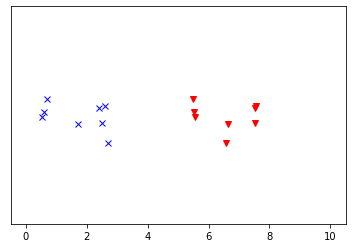

In [193]:
np.random.seed(0)
dataD = np.array([0.5,0.5,0.5,1.5,2.5,2.5,2.5,2.5]).reshape((8,)) + np.random.normal(scale = 0.1,size = (8,))
dataD2 = np.array([0.5,0.5,0.5,1.5,1.5,2.5,2.5,2.5]).reshape((8,)) + np.random.normal(scale = 0.1,size = (8,))+5
y =  np.random.normal(size = (8,),scale = 0.05,)
plt.plot(dataD,y,"bx")
plt.plot(dataD2,y,"rv")
plt.ylim(-0.5,0.5)
plt.yticks([])
plt.xlim(-0.5,10.5)
plt.show()
#print(size = (y.shape)

Discretize the observation by histogram

- 0.4,0.6,0.8 ----> 1
- 1.8 ----> 2
- 2.1,2.3,2.4,2.5 ---> 3

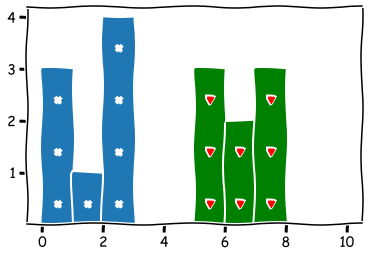

In [81]:
deltaX = 5
dataD = np.array([0.5,0.5,0.5,1.5,2.5,2.5,2.5,2.5])
dataD2 = np.array([0.5,0.5,0.5,1.5,1.5,2.5,2.5,2.5])
y = np.array([1,2,3,1,1,2,3,4])-0.6
y2 = np.array([1,2,3,1,2,1,2,3])-0.6
#fig,a= plt.figure()
with plt.xkcd():
    plt.plot(dataD,y,"wx")
    plt.xlim(-0.5,10.5)
    plt.hist(dataD,bins=[0,1,2,3])
    plt.plot(dataD2+deltaX,y2,"rv")
    plt.yticks([1,2,3,4])
    plt.hist(dataD2+deltaX,bins=np.array([0,1,2,3])+deltaX,color="green")

Shift the first observation to match the distribution of the second.

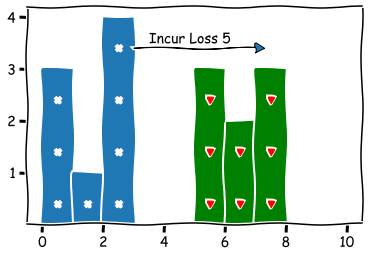

In [83]:
with plt.xkcd():
    plt.plot(dataD,y,"wx")
    plt.xlim(-0.5,10.5)
    plt.hist(dataD,bins=[0,1,2,3])
    plt.plot(dataD2+deltaX,y2,"rv")
    plt.yticks([1,2,3,4])
    plt.hist(dataD2+deltaX,bins=np.array([0,1,2,3])+deltaX,color="green")
    plt.arrow(3,3.4,deltaX-1,0,head_width = 0.2)
    plt.annotate("Incur Loss 5", xy=(3.5,3.5))


- Find the optimal strategy to move with minimum loss.
- The minimum loss is the wasserstein metric.

# The 2D+ Wasstertein Metric


1. Randomly draw a unit vector $v\in\mathbb{R}^d$ ($\|v \|_2 = 1$)
2. Project the samples of $X$ onto this direction, i.e., compute vector inner product $r_i = \langle X_i, v\rangle$ for $i=1,\cdots,N_X$.
3. Project the samples of $Y$ onto this direction, i.e., compute vector inner product $s_j = \langle Y_j, v\rangle$ for $j=1,\cdots, N_Y$.
4. Compute the Wasserstein distance $D\big(\{r_i\}_{i=1}^{N_X}, \{s_j\}_{j=1}^{N_Y}\big)$ between two one-dimensional data samples $\{r_i\}_{i=1}^{N_X}$ and $\{s_j\}_{j=1}^{N_Y}$.



In [147]:
mean1 = [[0, 0], [0, 10], [2, 1], [1, -2], [3,5]]
mean2 = [[1, 2], [1, 15], [-2, -2], [-1, -2], [-3,-5]]
cov1 = [[[1, 0], [0, 150]], [[90, 0], [0, 5]], [[4, 1], [1, 4]], [[40, 5], [5, 40]], [[90, 15], [15, 16]]]
n1 = [100, 100, 100, 100, 100]
n2 = [600, 600, 800, 600, 600]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean2, cov1, n2)

def oneProjEg(data1,data2):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    axes[0,0].scatter(data1[:,0],data1[:,1],alpha = 0.3,s=0.8)
    axes[0,1].scatter(data2[:,0],data2[:,1],alpha = 0.3,s=0.8)
    axes[0,0].text(-20, 30,r'X Samples',ha='center',fontdict=dict(size=12))
    axes[0,1].text(-20, 30,r'Y Samples',ha='center',fontdict=dict(size=12))
    transMat = np.random.normal(size = (2, 1))
    transMat = transMat / np.linalg.norm(transMat, 'fro')
    data1_proj = X @ transMat
    data2_proj = Y @ transMat
    h1 = axes[1,0].hist(data1_proj,bins = 200)
    h2 = axes[1,1].hist(data2_proj,bins = 200)
    axes[0,0].arrow(-transMat[0,0]*15,
                    -transMat[1,0]*15,
                    transMat[0,0]*30,
                    transMat[1,0]*30,color="black")
    axes[0,1].arrow(-transMat[0,0]*15,
                    -transMat[1,0]*15,
                    transMat[0,0]*30,
                    transMat[1,0]*30,color="black")
    result = wass.wass1dim(data1_proj, data2_proj)
    value = "Wass Metric = " + str(np.round(result,3))
    axes[0,0].text(-5,35,value,color = "red",fontdict=dict(size = 13))



### One Round of Projection

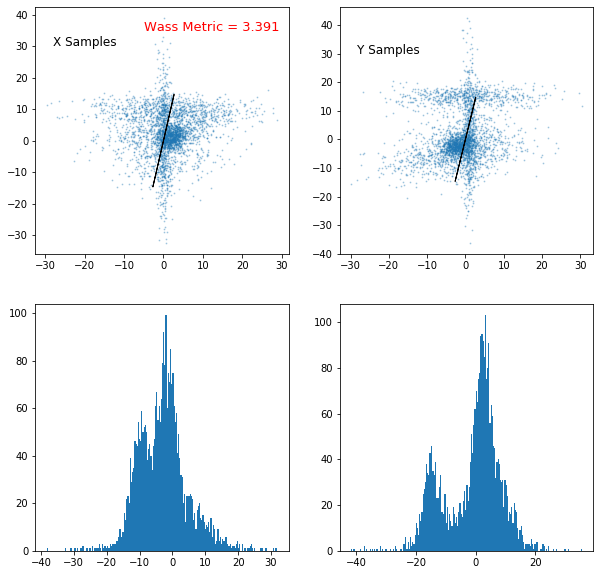

In [148]:
oneProjEg(X,Y)

### The Second Projection

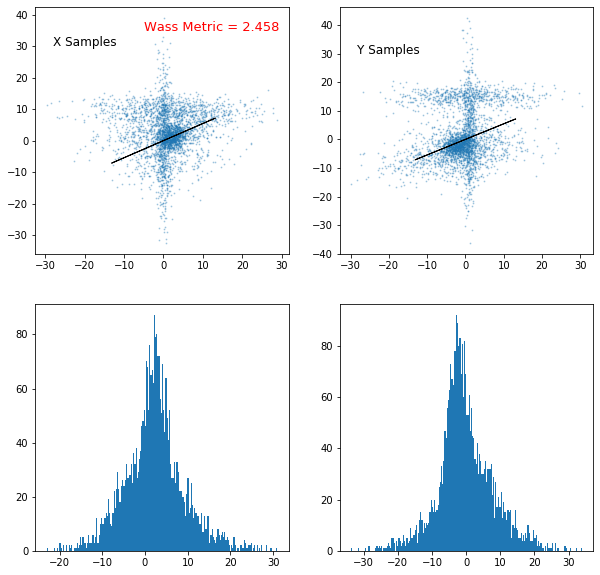

In [149]:
oneProjEg(X,Y)

### The third Projection

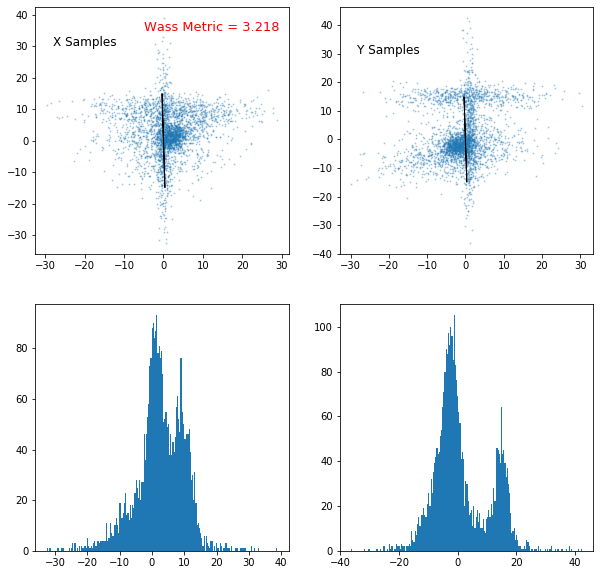

In [150]:
oneProjEg(X,Y)

## Examples
### Eg. 1

Both $X_1,\cdots, X_{900}$ and $Y_1,\cdots, Y_{900}$ comes from the same distribution
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
where
$$
\boldsymbol{\mu}_1 = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_2 = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_3 = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$

100% (2000 of 2000) |####################| Elapsed Time: 0:00:04 Time:  0:00:04


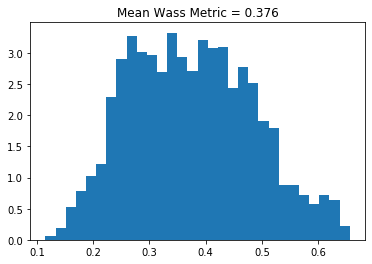

In [153]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n2 = [300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean1, cov1, n2)
mean, se, dist = wass.compareDensity(X, Y)
p = plt.hist(dist,bins = 30,density = True)
mean = np.round(mean,3)
p = plt.title("Mean Wass Metric = " + str(mean))

### Eg. 2

The first group $X_1,\cdots, X_{900}$  comes from (a missing component)
$$
(1/2)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(0)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/2)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
and the second group  $Y_1,\cdots, Y_{900}$ comes from
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
where
$$
\boldsymbol{\mu}_1 = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_2 = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_3 = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$

100% (2000 of 2000) |####################| Elapsed Time: 0:00:04 Time:  0:00:04


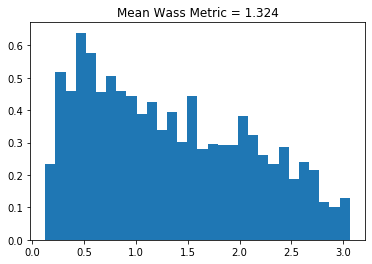

In [154]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n1 = [450, 0, 450]
n2 = [300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n1)
Y = data_generation(mean1, cov1, n2)
mean, se, dist = wass.compareDensity(X, Y)
p = plt.hist(dist,bins = 30,density = True)
mean = np.round(mean,3)
p = plt.title("Mean Wass Metric = " + str(mean))

### Eg. 3
Given the mixed distribution
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
The first group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{X1} = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X2} = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X3} = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$
The second group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{Y1} = \begin{pmatrix}
1\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y2} = \begin{pmatrix}
1\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y3} = \begin{pmatrix}
3\\1\\4\\5\end{pmatrix}.
$$

100% (2000 of 2000) |####################| Elapsed Time: 0:00:04 Time:  0:00:04


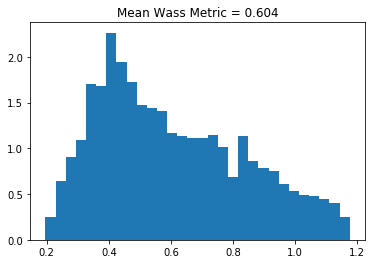

In [155]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
mean2 = [[1, 0, 0, 0], 
         [1, 10, 3, 0], 
         [3, 1, 4, 5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n2 = [300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean2, cov1, n2)
mean, se, dist = wass.compareDensity(X, Y)
p = plt.hist(dist,bins = 30,density = True)
mean = np.round(mean,3)
p = plt.title("Mean Wass Metric = " + str(mean))

### Eg. 4
Given the mixed distribution
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
The first group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{X1} = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X2} = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X3} = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$
The second group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{Y1} = \begin{pmatrix}
1\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y2} = \begin{pmatrix}
1\\-10\\-3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y3} = \begin{pmatrix}
3\\-1\\-4\\-5\end{pmatrix}.
$$

100% (2000 of 2000) |####################| Elapsed Time: 0:00:04 Time:  0:00:04


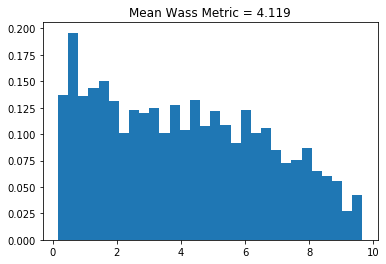

In [156]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
mean2 = [[1, 0, 0, 0], 
         [1, -10, -3, 0], 
         [3, -1, -4, -5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n2 = [300, 300, 300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean2, cov1, n2)
mean, se, dist = wass.compareDensity(X, Y)
p = plt.hist(dist,bins = 30,density = True)
mean = np.round(mean,3)
p = plt.title("Mean Wass Metric = " + str(mean))